In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits import mplot3d

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_fn1 = "/content/drive/My Drive/Colab Notebooks/1d_team_21_train.txt"
dev_fn1 = "/content/drive/My Drive/Colab Notebooks/1d_team_21_dev.txt"
train_fn2 = "/content/drive/My Drive/Colab Notebooks/2d_team_21_train.txt"
dev_fn2 = "/content/drive/My Drive/Colab Notebooks/2d_team_21_dev.txt"

file1= open(train_fn1)
train_data1=np.array([[float(lines.split()[0]),float(lines.split()[1])] for lines in file1.readlines()],dtype=np.float64)
X_train1=train_data1[:,0]
Y_train1=train_data1[:,1]

file2= open(dev_fn1)
dev_data1=np.array([[float(lines.split()[0]),float(lines.split()[1])] for lines in file2.readlines()],dtype=np.float64)
X_dev1=dev_data1[:,0]
Y_dev1=dev_data1[:,1]


file3= open(train_fn2)
train_data2=np.array([[float(lines.split()[0]),float(lines.split()[1]),float(lines.split()[2])] for lines in file3.readlines()],dtype=np.float64)
train_tb2 = pd.DataFrame(train_data2,columns=['x1','x2','y'])

file4= open(dev_fn2)
dev_data2=np.array([[float(lines.split()[0]),float(lines.split()[1]),float(lines.split()[2])] for lines in file4.readlines()],dtype=np.float64)
dev_tb2 = pd.DataFrame(dev_data2,columns=['x1','x2','y'])


In [ ]:
train_tb2[['x1','x2']].values

array([[-0.999, -0.846],
       [-0.999,  0.497],
       [-0.997,  0.342],
       ...,
       [ 0.993,  0.859],
       [ 0.996,  0.398],
       [ 1.   ,  0.64 ]])

In [ ]:
np.random.seed(21)
def poly(x,degree):
    return np.array([x**i for i in range(degree+1)])

def regression(X,Y,m):
    A=np.array([poly(x,m) for x in X])
    return np.linalg.lstsq(A,Y,rcond=None)[0]

def ridge_regression(X,Y,m,lamda):
    A=np.array([poly(x,m) for x in X])
    return np.dot(np.dot(np.linalg.pinv(np.dot(A.T, A) + lamda*np.identity(m+1)), A.T), Y) #used closed form soln

def error(a,b):
  return np.sqrt(np.mean((a-b)**2))


def plot_lstsq_deg(N,reg,ylim=(),ylimc=0,err_plot=True):
  index = np.random.choice(X_train1.shape[0],N,replace=False)
  X=X_train1[index]
  Y=Y_train1[index]
  
  degree = [1,5,10]

  plt.subplots(figsize=(6,12))
  
  soln = reg(X,Y,degree[0]) 
  plt.subplot('311')
  t=np.linspace(0,5,100)
  ft=np.polyval(soln[::-1],t)
  plt.plot(t,ft)
  plt.scatter(X,Y,color='red')
  if ylimc:
    plt.ylim(ylim[0],ylim[1])
  plt.title("polynomial degree ="+str(degree[0])+" (for N ="+str(N)+")")
  plt.grid()

  soln = reg(X,Y,degree[1]) 
  plt.subplot('312')
  t=np.linspace(0,5,100)
  ft=np.polyval(soln[::-1],t)
  plt.plot(t,ft)
  plt.scatter(X,Y,color='red')
  if ylimc:
    plt.ylim(ylim[0],ylim[1])
  plt.title("polynomial degree ="+str(degree[1])+" (for N ="+str(N)+")")
  plt.grid()

  soln = reg(X,Y,degree[2]) 
  plt.subplot('313')
  t=np.linspace(0,5,100)
  ft=np.polyval(soln[::-1],t)
  plt.plot(t,ft)
  plt.scatter(X,Y,color='red')
  if ylimc:
    plt.ylim(ylim[0],ylim[1])
  plt.title("polynomial degree ="+str(degree[2])+" (for N ="+str(N)+")")
  plt.grid()


  if err_plot:  
    Error1=[]
    Error2=[]
    for i in range(25):
      soln = reg(X,Y,i)
      Error1.append(error(np.polyval(soln[::-1],X),Y))
      Error2.append(error(np.polyval(soln[::-1],X_dev1),Y_dev1))
    plt.figure()
    plt.scatter(range(25),Error1)
    plt.plot(range(25),Error1,label='train')
    plt.grid()
    #plt.title("Error plot(for training data) with varying model complexity")

    plt.scatter(range(25),Error2,color='r')
    plt.plot(range(25),Error2,color='r',label='dev')
    plt.legend()
    
    plt.title("Error plot(for training and development data) with varying model complexity")




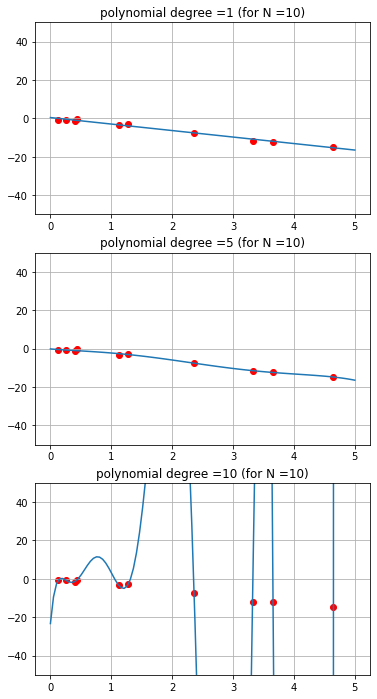

In [ ]:
plot_lstsq_deg(10,regression,ylim=(-50,50),ylimc=True,err_plot=False) #lets try for various values of train samples sizes-10,50,100,150,200

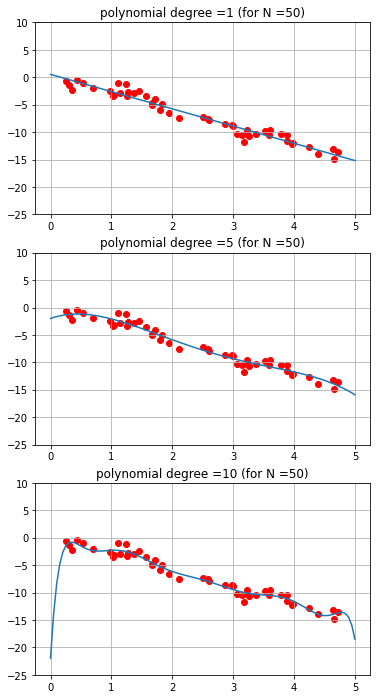

In [ ]:
plot_lstsq_deg(50,regression,ylim=(-25,10),ylimc=True,err_plot=False)

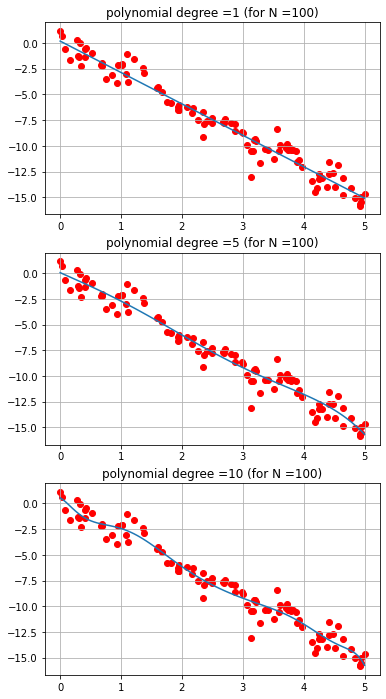

In [ ]:
plot_lstsq_deg(100,regression,err_plot=False)

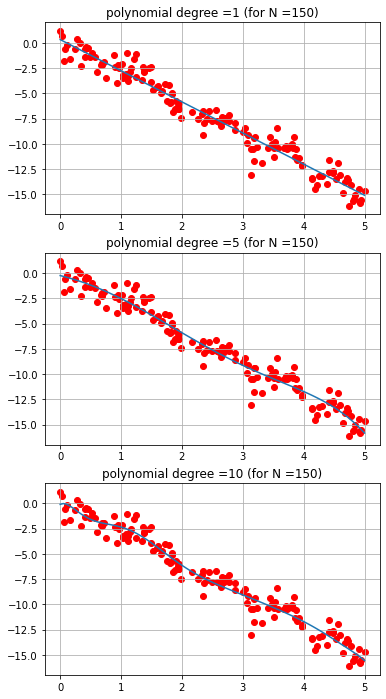

In [ ]:
plot_lstsq_deg(150,regression,err_plot=False)

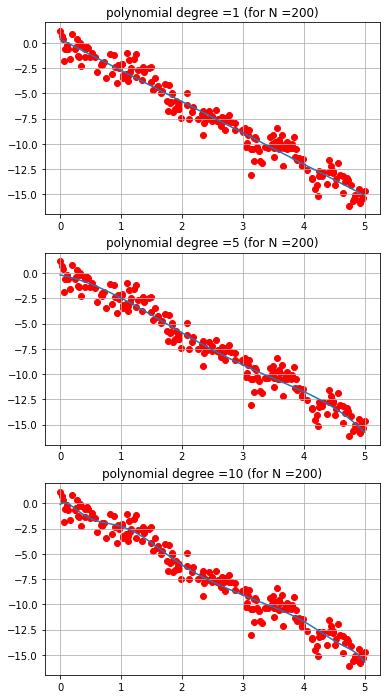

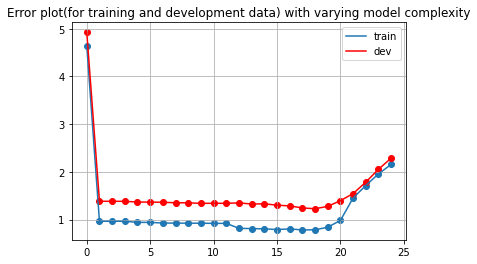

In [ ]:
plot_lstsq_deg(200,regression)

In [ ]:
# model complexity=12-18 seems optimal

Text(0.5, 1.0, 'Ridge regression with lambda = 0.01')

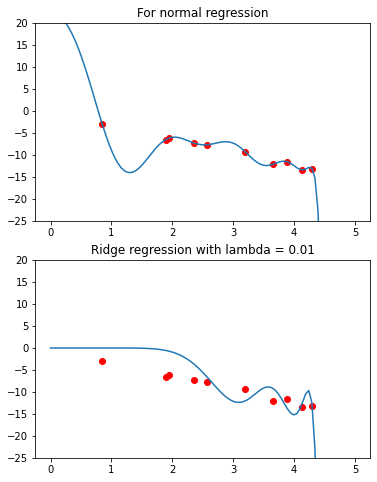

In [ ]:
np.random.seed(22)
#Now lets do ridge regression
 #for model complexity =15

index = np.random.choice(X_train1.shape[0],10,replace=False)
X=X_train1[index]
Y=Y_train1[index]


soln = regression(X,Y,15) 
plt.subplots(figsize=(6,8))
plt.subplot('211')
t=np.linspace(0,5,100)
ft=np.polyval(soln[::-1],t)
  #Error.append(error(np.polyval(soln[::-1],X),Y))
plt.ylim(-25,20)
plt.plot(t,ft)
plt.scatter(X,Y,color='red')
plt.title("For normal regression")


soln = ridge_regression(X,Y,18,lamda=0.01) 
plt.subplot('212')
t=np.linspace(0,5,100)
ft=np.polyval(soln[::-1],t)
#Error.append(error(np.polyval(soln[::-1],X),Y))
plt.ylim(-25,20)
plt.plot(t,ft)
plt.scatter(X,Y,color='red')
plt.title("Ridge regression with lambda = "+str(0.01))

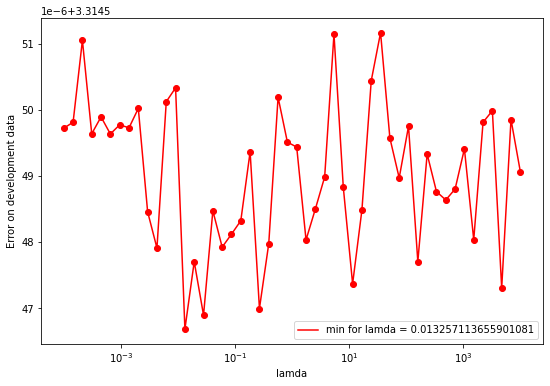

In [ ]:
#error plot for ridge regression
Error=[]
lamda_vals = np.logspace(-4,4)
for l in lamda_vals:
  soln = ridge_regression(X_train1,Y_train1,18,l)
  Error.append(error(np.polyval(soln[::-1],X_dev1),Y_dev1))
min=lamda_vals[np.argmin(Error)]
plt.figure(figsize=(9,6))
plt.scatter(lamda_vals,Error,color='r')
plt.plot(lamda_vals,Error,color='r',label="min for lamda = "+str(min))
plt.ylabel("Error on development data")
plt.xlabel("lamda")
plt.xscale('log')
plt.legend()
plt.title("Error for various lambda values")

optimal_lamda1 = min

In [ ]:
#Now lets experiment for 2-d data.

In [ ]:
def poly_2d(arr,degree):
  pol=[]
  for i in range(degree+1):
    for j in range(i+1):
      pol.append((arr[0]**(i-j))*(arr[1]**j))
  return pol

def poly_2d_val(c,arr,degree):
  pol=0
  for i in range(degree+1):
    for j in range(i+1):
      ind=int((i*(i+1)/2)+j)
      pol += (c[ind])*(arr[:,0]**(i-j))*(arr[:,1]**j)  # assuming arr is 2-d
  return pol

def poly_2d_val_mesh(c,x,y,degree):
  pol=0
  for i in range(degree+1):
    for j in range(i+1):
      ind=int((i*(i+1)/2)+j)
      pol += (c[ind])*(x**(i-j))*(y**j)  
  return pol

def regression_2d(X,Y,m):
    A=np.array([poly_2d(x,m) for x in X])
    return np.linalg.lstsq(A,Y,rcond=None)[0]

def ridge_regression_2d(X,Y,m,lamda):
    A=np.array([poly_2d(x,m) for x in X])
    s=int((m+1)*(m+2)/2)
    return np.dot(np.dot(np.linalg.pinv(np.dot(A.T, A) + lamda*np.identity(s)), A.T), Y)




/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


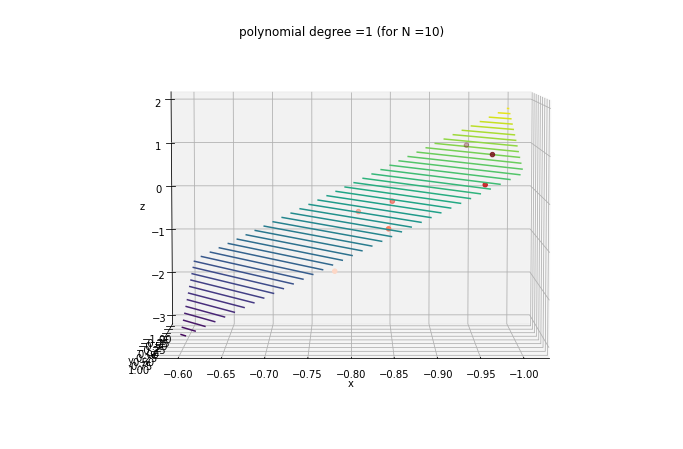

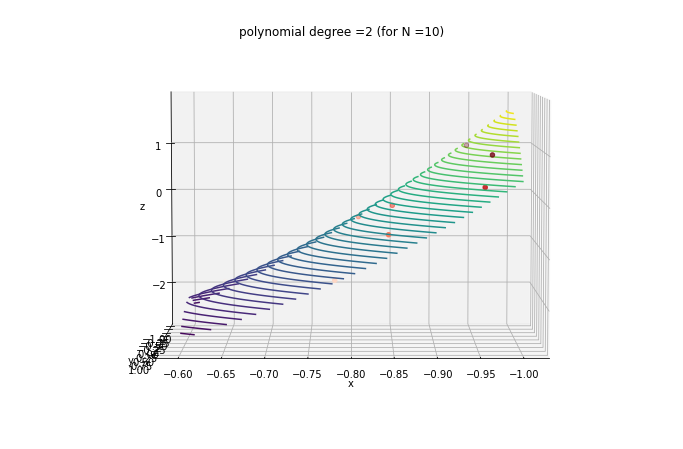

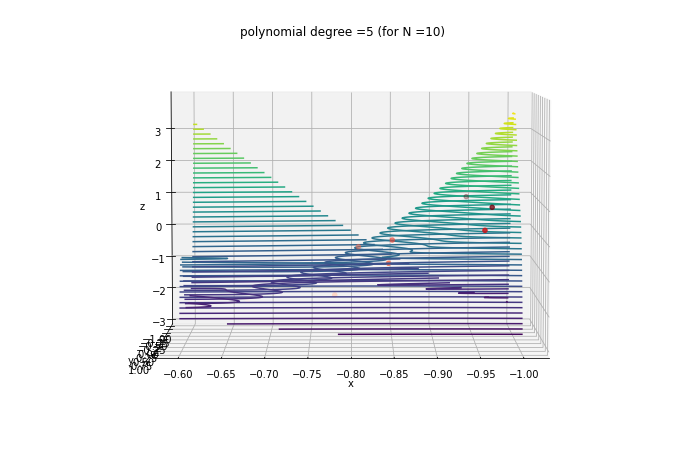

In [ ]:
np.random.seed(23)
index = np.random.choice(X_train1.shape[0],10,replace=False)
X_t=train_tb2[['x1','x2']].values[index]
Y_t=train_tb2['y'].values[index]
for degree in [1,2,5]:

  c1=regression_2d(X_t,Y_t,degree)

  x=np.linspace(-1,-0.6,100)
  y=np.linspace(-1,1,100)
  X,Y = np.meshgrid(x,y)
  Z = poly_2d_val_mesh(c1,X,Y,degree)

  fig = plt.figure(figsize=(12,8))
  ax = plt.axes(projection='3d')
  ax.contour3D(X, Y, Z, 50)
  ax.scatter3D(X_t[:,0], X_t[:,1], Y_t, c=Y_t, cmap='Reds')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  ax.view_init(5,90)
  plt.title("polynomial degree ="+str(degree)+" (for N ="+str(10)+")")


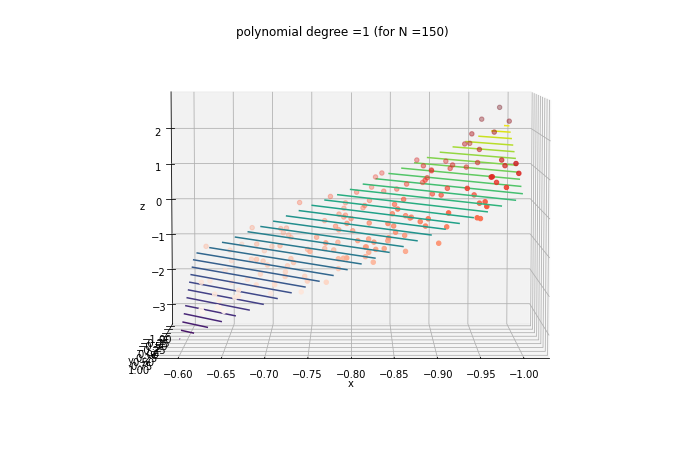

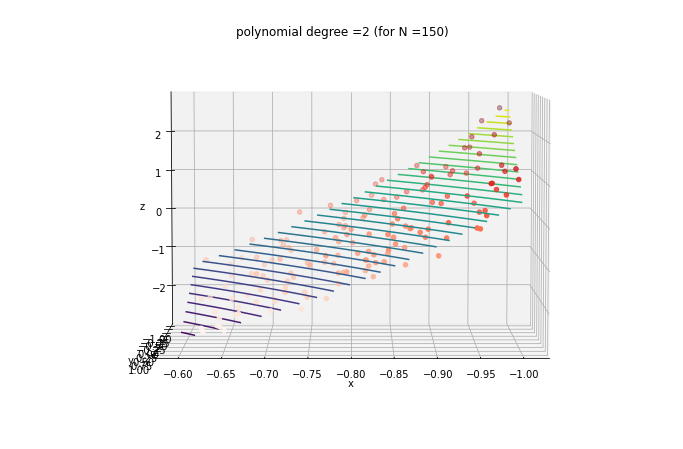

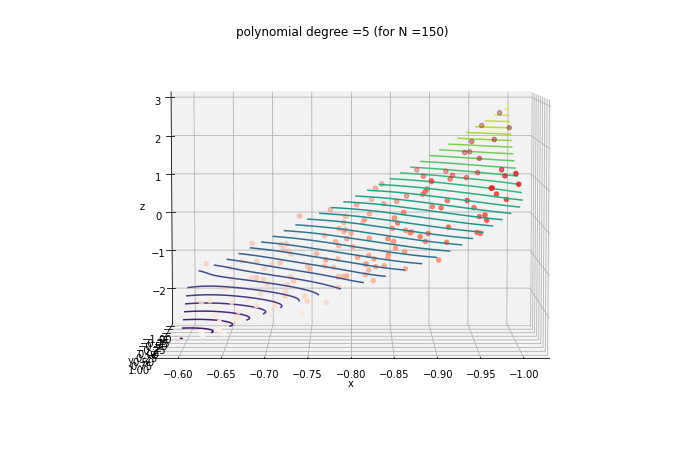

In [ ]:
np.random.seed(24)
index = np.random.choice(X_train1.shape[0],150,replace=False)
X_t=train_tb2[['x1','x2']].values[index]
Y_t=train_tb2['y'].values[index]
for degree in [1,2,5]:

  c1=regression_2d(X_t,Y_t,degree)

  x=np.linspace(-1,-0.6,100)
  y=np.linspace(-1,1,100)
  X,Y = np.meshgrid(x,y)
  Z = poly_2d_val_mesh(c1,X,Y,degree)

  fig = plt.figure(figsize=(12,8))
  ax = plt.axes(projection='3d')
  ax.contour3D(X, Y, Z, 50)
  ax.scatter3D(X_t[:,0], X_t[:,1], Y_t, c=Y_t, cmap='Reds')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  ax.view_init(5,90)
  plt.title("polynomial degree ="+str(degree)+" (for N ="+str(150)+")")

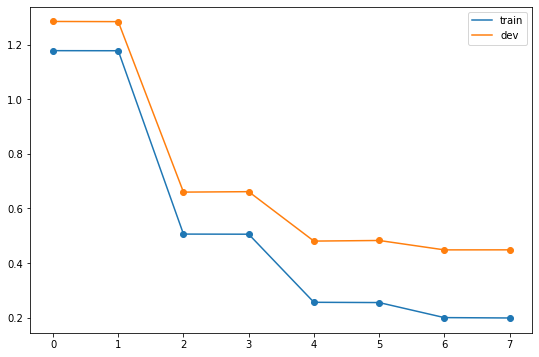

In [ ]:
X_t=train_tb2[['x1','x2']].values
Y_t=train_tb2['y'].values
X_d=dev_tb2[['x1','x2']].values
Y_d=dev_tb2['y'].values

err_t=[]
err_d=[]
for degree in range(8):
  c1=regression_2d(X_t,Y_t,degree)
  err_t.append(error(poly_2d_val(c1,X_t,degree),Y_t))
  err_d.append(error(poly_2d_val(c1,X_d,degree),Y_d))

plt.figure(figsize=(9,6))
plt.plot(range(8),err_t,label='train')
plt.scatter(range(8),err_t)
plt.plot(range(8),err_d,label='dev')
plt.scatter(range(8),err_d)
plt.legend()


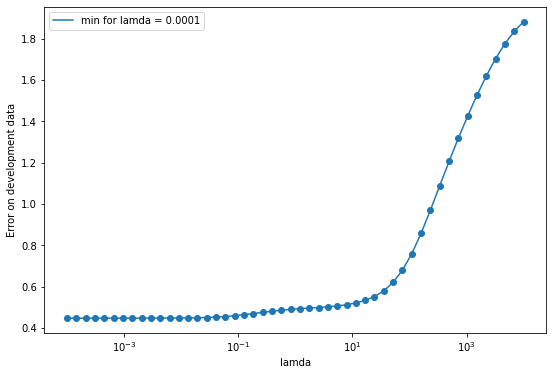

In [ ]:
#choosing optimal as degree=7/6
#trying ridge regression
X_t=train_tb2[['x1','x2']].values
Y_t=train_tb2['y'].values
X_d=dev_tb2[['x1','x2']].values
Y_d=dev_tb2['y'].values


err_d=[]
T= np.logspace(-4,4)
for lamda in T:
  c1=ridge_regression_2d(X_t,Y_t,6,lamda)
  err_d.append(error(poly_2d_val(c1,X_d,6),Y_d))

min=T[np.argmin(err_d)]
plt.figure(figsize=(9,6))
plt.plot(T,err_d,label='min for lamda = '+str(min))
plt.scatter(T,err_d)
plt.ylabel("Error on development data")
plt.xlabel("lamda")
plt.xscale('log')
plt.legend()
plt.title("Error for various lambda values")
optimal_lamda2 = min